# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
plt.style.use('seaborn')

# IMPORTING DATASET

In [3]:
dataset=pd.read_csv('brent-daily.csv')
dataset

,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63
...,...,...
8390,2020-06-09,40.45
8391,2020-06-10,41.18
8392,2020-06-11,37.76
8393,2020-06-12,38.54


In [4]:
type(dataset)

pandas.core.frame.DataFrame

In [5]:
dataset.describe()

,Price
count,8395.000000
mean,46.379194
std,32.459995
min,9.100000
25%,18.780000
50%,31.770000
75%,66.810000
max,143.950000


In [6]:
dataset.info

<bound method DataFrame.info of             Date  Price
0     1987-05-20  18.63
1     1987-05-21  18.45
2     1987-05-22  18.55
3     1987-05-25  18.60
4     1987-05-26  18.63
...          ...    ...
8390  2020-06-09  40.45
8391  2020-06-10  41.18
8392  2020-06-11  37.76
8393  2020-06-12  38.54
8394  2020-06-15  39.44

[8395 rows x 2 columns]>

# DATA VISUALIZATION

In [7]:
df=pd.DataFrame(dataset)
df['day']=pd.DatetimeIndex(df['Date']).day
print(df)

            Date  Price  day
0     1987-05-20  18.63   20
1     1987-05-21  18.45   21
2     1987-05-22  18.55   22
3     1987-05-25  18.60   25
4     1987-05-26  18.63   26
...          ...    ...  ...
8390  2020-06-09  40.45    9
8391  2020-06-10  41.18   10
8392  2020-06-11  37.76   11
8393  2020-06-12  38.54   12
8394  2020-06-15  39.44   15

[8395 rows x 3 columns]


In [8]:
df['month']=pd.DatetimeIndex(df['Date']).month
print(df)

            Date  Price  day  month
0     1987-05-20  18.63   20      5
1     1987-05-21  18.45   21      5
2     1987-05-22  18.55   22      5
3     1987-05-25  18.60   25      5
4     1987-05-26  18.63   26      5
...          ...    ...  ...    ...
8390  2020-06-09  40.45    9      6
8391  2020-06-10  41.18   10      6
8392  2020-06-11  37.76   11      6
8393  2020-06-12  38.54   12      6
8394  2020-06-15  39.44   15      6

[8395 rows x 4 columns]


In [9]:
df['year']=pd.DatetimeIndex(df['Date']).year
print(df)

            Date  Price  day  month  year
0     1987-05-20  18.63   20      5  1987
1     1987-05-21  18.45   21      5  1987
2     1987-05-22  18.55   22      5  1987
3     1987-05-25  18.60   25      5  1987
4     1987-05-26  18.63   26      5  1987
...          ...    ...  ...    ...   ...
8390  2020-06-09  40.45    9      6  2020
8391  2020-06-10  41.18   10      6  2020
8392  2020-06-11  37.76   11      6  2020
8393  2020-06-12  38.54   12      6  2020
8394  2020-06-15  39.44   15      6  2020

[8395 rows x 5 columns]


In [10]:
x=dataset.iloc[:,2:5]
x

,day,month,year
0,20,5,1987
1,21,5,1987
2,22,5,1987
3,25,5,1987
4,26,5,1987
...,...,...,...
8390,9,6,2020
8391,10,6,2020
8392,11,6,2020
8393,12,6,2020


In [11]:
y=dataset.iloc[:,1:2]
y

,Price
0,18.63
1,18.45
2,18.55
3,18.60
4,18.63
...,...
8390,40.45
8391,41.18
8392,37.76
8393,38.54


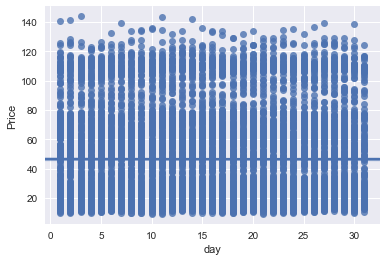

In [12]:
x=df['day']
y=df['Price']
sns.regplot(x,y,data=dataset)

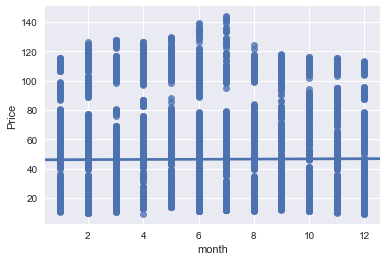

In [13]:
x=df['month']
y=df['Price']
sns.regplot(x,y,data=dataset)

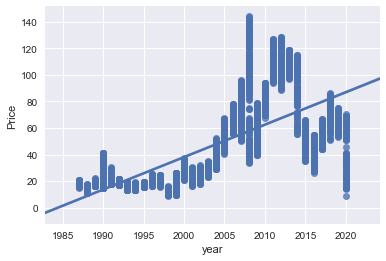

In [14]:
x=df['year']
y=df['Price']
sns.regplot(x,y,data=dataset)

Text(0.5, 1.0, 'Month vs Oil Prices')

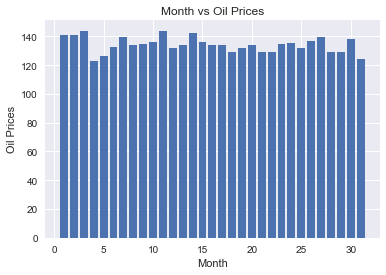

In [15]:
plt.bar(df['day'],df['Price'],align='center')
plt.ylabel("Oil Prices")
plt.xlabel("Month")
plt.title("Month vs Oil Prices")

Text(0.5, 1.0, 'Month vs Oil Prices')

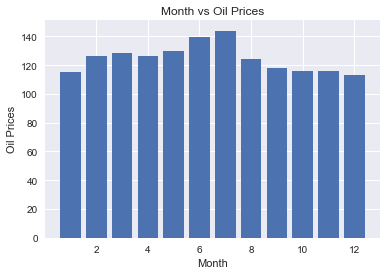

In [16]:
plt.bar(df['month'],df['Price'],align='center')
plt.ylabel("Oil Prices")
plt.xlabel("Month")
plt.title("Month vs Oil Prices")

Text(0.5, 1.0, 'Year vs Oil Prices')

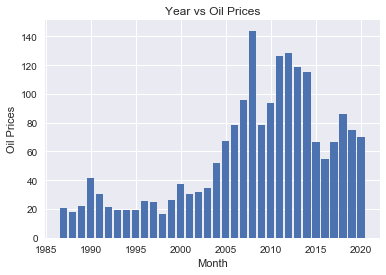

In [16]:
plt.bar(df['year'],df['Price'],align='center')
plt.ylabel("Oil Prices")
plt.xlabel("Year")
plt.title("Year vs Oil Prices")

# TAKING CARE OF MISSING DATA

In [17]:
dataset.isnull().any()

Date     False
Price    False
day      False
month    False
year     False
dtype: bool

In [22]:
x=dataset.iloc[:,2:5].values
x

array([[  20,    5, 1987],
       [  21,    5, 1987],
       [  22,    5, 1987],
       ...,
       [  11,    6, 2020],
       [  12,    6, 2020],
       [  15,    6, 2020]], dtype=int64)

In [23]:
y=dataset.iloc[:,1:2].values
y

array([[18.63],
       [18.45],
       [18.55],
       ...,
       [37.76],
       [38.54],
       [39.44]])

LABEL ENCODING and ONE HOT ENCODING isn't required as the dataset is in digits and not many categories.

# SPLITTING DATA INTO TRAIN AND TEST

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
x_train

array([[  15,    9, 1999],
       [  14,    6, 2004],
       [  13,    4, 2017],
       ...,
       [  20,    6, 2006],
       [   3,    4, 2000],
       [  19,    2, 1998]], dtype=int64)

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# TRAINING AND TESTING THE MODEL

In [26]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor(random_state=0,criterion="mse",max_depth=10) #default parameter is MSE so need not give

dt.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

In [27]:
import pickle
pickle.dump(dt,open('decision1.pkl','wb'))

In [28]:
y_predict=dt.predict(x_test)
y_predict

array([23.249375  , 57.2       , 81.95428571, ..., 22.35      ,
        9.7       , 12.864375  ])

In [29]:
dt.predict([[25,9,2003]])

array([38.54])

# EVALUATION

In [30]:
from sklearn.metrics import r2_score

In [31]:
r2_score(y_test,dt.predict(x_test))

0.9969141537237985

In [32]:
r2_score(y_train,dt.predict(x_train))

0.9976867585258866

C:\Users\Yasha\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


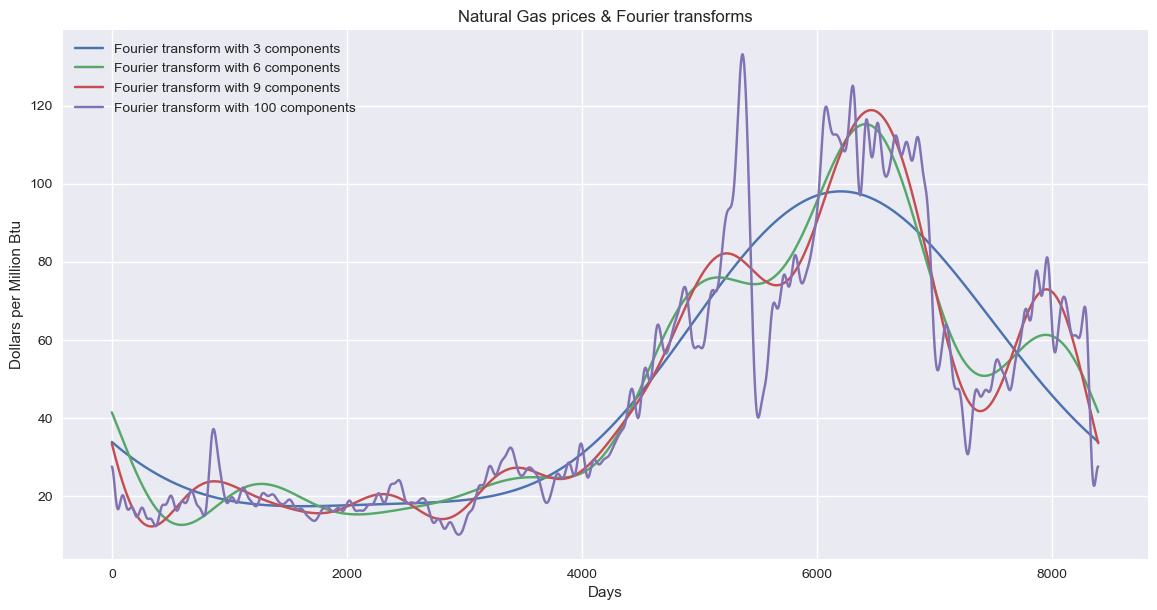

In [33]:
ng_fft = np.fft.fft(np.asarray(dataset['Price'].tolist()))
fft_df = pd.DataFrame({'fft':ng_fft})
fft_df['absolute'] = fft_df['fft'].apply(lambda x: np.abs(x))
fft_df['angle'] = fft_df['fft'].apply(lambda x: np.angle(x))

plt.figure(figsize=(14, 7), dpi=100)
fft_list = np.asarray(fft_df['fft'].tolist())
for num_ in [3, 6, 9, 100]:
    fft_list_m10= np.copy(fft_list); fft_list_m10[num_:-num_]=0
    plt.plot(np.fft.ifft(fft_list_m10), label='Fourier transform with {} components'.format(num_))

plt.xlabel('Days')
plt.ylabel('Dollars per Million Btu')
plt.title('Natural Gas prices & Fourier transforms')
plt.legend()
plt.show()

C:\Users\Yasha\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.237152 to fit



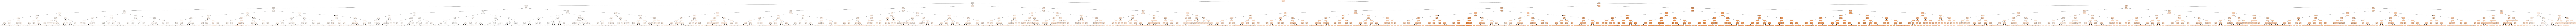

In [34]:
from sklearn.externals.six import StringIO  
from IPython.display import Image
#from PIL import Image
from sklearn.tree import export_graphviz
import graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())
#graph.write_png("decision2.png")
#Image.open('decision2.png')
